<a href="https://colab.research.google.com/github/AndreaRR-2003/03MIAR----Algoritmos-de-Optimizacion---2026/blob/main/Andrea_Rojo_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AG2 - Actividad Guiada 2
Nombre: Andrea Rojo Rodriguez <br>
Link:   https://colab.research.google.com/drive/xxxxxxxxxxxxxxxxxxxxxxxxx <br>
Github: https://github.com/xxxxx/AlgoritmosOptimizacion
<br>




In [ ]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

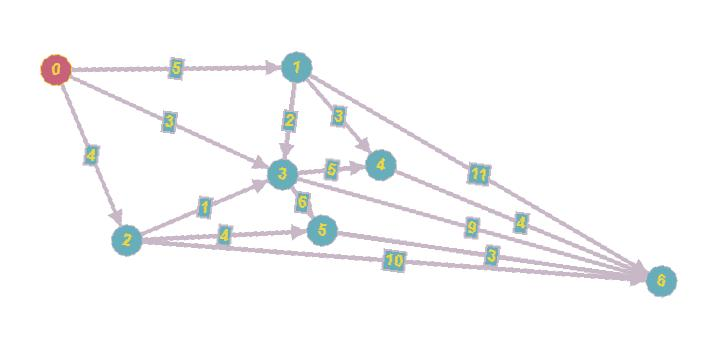

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E
#agentes:filas
#tareas columnas
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]
#se va a utilizar la estructura del arbol para eliminar numeros de calculos determinados.
#una vez se haya asignado la tarea a un gente, se pasa al siguiente nodo.
#en backtracking cuando se ve que la expansion del arbol, en el de las reinas, se interpreta que el coste de resolucion es muy alto, y no
#merece la pena seguir explorando. Lo mejor era volver para artrás-

#Aqui se va a definir una manera de calcular la cota inferiory superior de los agentes restantes.
# si la cota superior de uno de los subarboles es menor que la cota inferior de otro arbol, se podría descartar.


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)#para el agente 1 se ale asigna la tarea 3 que vale 17(se mira la primera columna y es el 3 es decir el 17) y al agente 2 se ale asigna la tarea 2 que vale 17
#17+17=34

34

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    print(i, S[i], COSTES[i][S[i]])
    VALOR += COSTES[i][S[i]]
    #print(VALOR)

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    print([[ COSTES[j][i] for j in range(len(S), len(COSTES))  ]])
    VALOR2=min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
    VALOR += VALOR2
    #print(VALOR2)
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

#CI((0,1),COSTES) #68
#CI((3,2),COSTES) #95
CI((1,3),COSTES) #76

0 1 12
1 3 22
[[19, 20]]
[[23, 28]]


76

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })#en este caso el NODO es la tupla de 0,
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]#se almacenan ramas completas
#se meten dos datos en la solucion:el valor solucion y la conta intermedia
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1 #en cada iteracion se comprueban los nodos candodatos en cada momento y además lo que se generan

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']#para cada solucion se mira la cota inferior, con esto se obtiene el nodo de menor cota inferior.
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]#si la longitud de la tupla es la misma que la dimension que tengo
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

[[11, 14, 11, 17]]
[[12, 15, 17, 14]]
[[18, 13, 19, 20]]
[[40, 22, 23, 28]]
0 0 11
[[15, 17, 14]]
[[13, 19, 20]]
[[22, 23, 28]]
0 1 12
[[15, 17, 14]]
[[13, 19, 20]]
[[22, 23, 28]]
0 2 18
[[15, 17, 14]]
[[13, 19, 20]]
[[22, 23, 28]]
0 3 40
[[15, 17, 14]]
[[13, 19, 20]]
[[22, 23, 28]]
0 0 11
1 1 15
[[19, 20]]
[[23, 28]]
0 0 11
1 2 13
[[19, 20]]
[[23, 28]]
0 0 11
1 3 22
[[19, 20]]
[[23, 28]]
0 1 12
1 0 14
[[19, 20]]
[[23, 28]]
0 1 12
1 2 13
[[19, 20]]
[[23, 28]]
0 1 12
1 3 22
[[19, 20]]
[[23, 28]]
0 0 11
1 2 13
2 1 17
[[28]]
0 0 11
1 2 13
2 3 23
[[28]]
0 2 18
1 0 14
[[19, 20]]
[[23, 28]]
0 2 18
1 1 15
[[19, 20]]
[[23, 28]]
0 2 18
1 3 22
[[19, 20]]
[[23, 28]]
0 1 12
1 2 13
2 0 11
[[28]]
0 1 12
1 2 13
2 3 23
[[28]]
0 1 12
1 2 13
2 0 11
3 3 28
0 0 11
1 1 15
2 2 19
[[28]]
0 0 11
1 1 15
2 3 23
[[28]]
0 1 12
1 0 14
2 2 19
[[28]]
0 1 12
1 0 14
2 3 23
[[28]]
0 0 11
1 2 13
2 1 17
3 3 28
La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


## Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

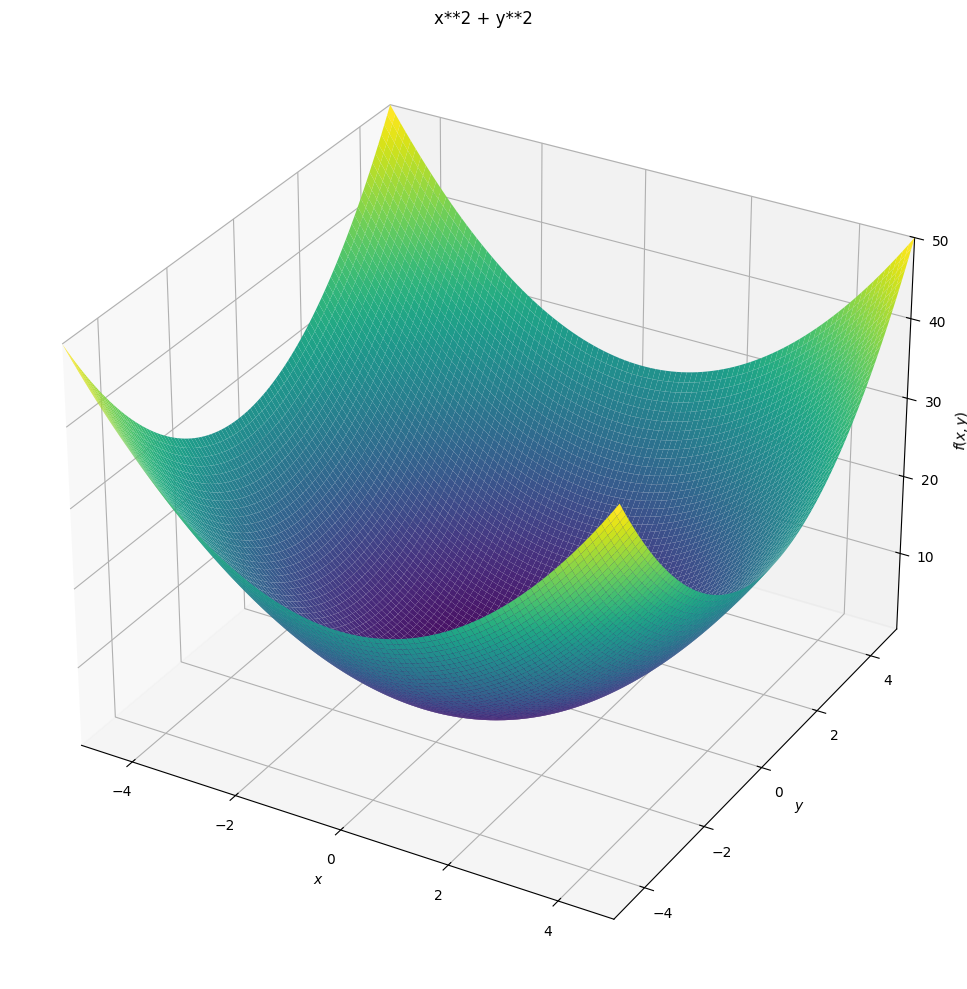

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

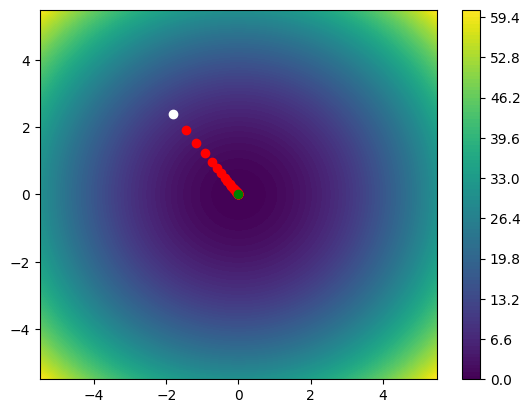

Solucion: [-2.5981353683161054e-05, 3.4172475347471106e-05] 1.842788810583027e-09


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
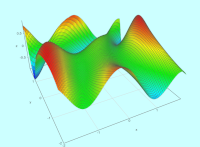


In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


## Práctica individual - Análisis para mejorar nota - Ramificación y poda. Práctica

¿Que complejidad tiene el algoritmo por fuerza bruta?

In [ ]:
def asignacion_tareas_fuerza_bruta(COSTES):
    dimension_costes=len(COSTES)
    iteracciones=0
    mejor_coste=float('inf')
    mejor_solucion=None

    def recursion_funcion(tareas_disponibles,solucion_parcial):

        nonlocal iteracciones, mejor_coste, mejor_solucion # se van a modificar variables de que se han creado fuera de la función.
        iteracciones+=1 #se van sumando los nodos que se visitan
        #Caso base
        if len(solucion_parcial)==dimension_costes:
            coste_actual=0
            for i in range(dimension_costes):
                coste_actual+=COSTES[i][solucion_parcial[i]]
            if coste_actual<mejor_coste: # si se encuentra un mejor coste se sustituye
                mejor_coste=coste_actual
                mejor_solucion=solucion_parcial[:] #se guarda para evitar modificarlo al hacer pop
            return


        for i in tareas_disponibles:
            solucion_parcial.append(i)#añadidmos la tarea i para el siguiente agente
            disponibles_nuevas=[j for j in tareas_disponibles if j!= i] #es una lista nueva de tareas_nuevas, quitando la que ya está asignada.
            recursion_funcion(disponibles_nuevas,solucion_parcial) #llamada recursiva
            solucion_parcial.pop() #probamos la siguiente tarea deshaciendo la elección

    recursion_funcion(list(range(dimension_costes)),[]) #se llama a la funcion de recursion_funcion

    return mejor_coste,mejor_solucion



asignacion_tareas_fuerza_bruta(COSTES)

(61, [0, 2, 3, 1])

El problema de Asignacion de Tarea resuelto por fuerza bruta tiene una complejidad temporal de O(n*n!), ya que hay n! asignaciones y hay que calcular el coste de n términos. Por lo tanto se puede decir que la complejidad temporal es O(n!).

Generar matrices con valores aleatorios de mayores dimensiones (5,6,7,…) y ejecutar ambos algoritmos.

In [ ]:
import random
def matrices_aleatorias(n,rango_min, rango_max):
    matriz=[]
    for _ in range(n):
        filas=[]
        for _ in range(n):
            filas.append(random.randint(rango_min, rango_max))
        matriz.append(filas)
    return matriz


n=6
COSTES=matrices_aleatorias(n,1, 100)
solucion_ramificacionypoda=ramificacion_y_poda(COSTES)
solucion_mejor_coste_fuerza_bruta, mejor_solucion_fuerza_bruta=asignacion_tareas_fuerza_bruta(COSTES)

[[82, 91, 26, 81, 68, 52]]
[[15, 71, 61, 90, 49, 41]]
[[74, 35, 30, 65, 40, 87]]
[[57, 44, 77, 67, 44, 91]]
[[4, 45, 83, 32, 10, 33]]
[[54, 70, 33, 49, 85, 8]]
0 0 82
[[71, 61, 90, 49, 41]]
[[35, 30, 65, 40, 87]]
[[44, 77, 67, 44, 91]]
[[45, 83, 32, 10, 33]]
[[70, 33, 49, 85, 8]]
0 1 15
[[71, 61, 90, 49, 41]]
[[35, 30, 65, 40, 87]]
[[44, 77, 67, 44, 91]]
[[45, 83, 32, 10, 33]]
[[70, 33, 49, 85, 8]]
0 2 74
[[71, 61, 90, 49, 41]]
[[35, 30, 65, 40, 87]]
[[44, 77, 67, 44, 91]]
[[45, 83, 32, 10, 33]]
[[70, 33, 49, 85, 8]]
0 3 57
[[71, 61, 90, 49, 41]]
[[35, 30, 65, 40, 87]]
[[44, 77, 67, 44, 91]]
[[45, 83, 32, 10, 33]]
[[70, 33, 49, 85, 8]]
0 4 4
[[71, 61, 90, 49, 41]]
[[35, 30, 65, 40, 87]]
[[44, 77, 67, 44, 91]]
[[45, 83, 32, 10, 33]]
[[70, 33, 49, 85, 8]]
0 5 54
[[71, 61, 90, 49, 41]]
[[35, 30, 65, 40, 87]]
[[44, 77, 67, 44, 91]]
[[45, 83, 32, 10, 33]]
[[70, 33, 49, 85, 8]]
0 4 4
1 0 91
[[30, 65, 40, 87]]
[[77, 67, 44, 91]]
[[83, 32, 10, 33]]
[[33, 49, 85, 8]]
0 4 4
1 1 71
[[30, 65, 40, 

¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?

El algoritmo dejaría er una opción cuando se prueban todas las posibilidades, ya que su complejidad es de O(n!).

¿Hay algún valor de la dimensión a partir de la cual el algoritmo de ramificación y poda deja de ser una opción válida?

No hay ningún valor de la dimensión a partir de la cual el algoritmo de ramificación y poda deja de ser una opción válida, ya que el rendimiento está en función de lo que poda mediante la cota inferior y superior, o del orden en el que se pode.

2) Minimizar la función por descenso del gradiente
¿Te atreves a optimizar la función? 𝑓(𝑥)=sin(1/2𝑥2−14𝑦2+3)⋅cos⁡(2𝑥+1−𝑒^𝑦)

In [ ]:
import math
import random
def descenso_por_gradiente():
    def funcion(entrada): #esta es la función de entrada del enunciado
        x,y=entrada
        termino1=math.sin(0.5*x*x - 0.25*y*y +3.0)
        termino2=math.cos(2.0*x+1.0 - math.exp(y))
        multiplicacion=termino1*termino2
        return multiplicacion

    def funcion_gradiente(entrada): #este es el calculo del gradiente de la funcion: f(x,y) = (df/dx, df/dy)
        x,y=entrada

        termino1_seno=math.sin(0.5*x*x - 0.25*y*y +3.0)
        termino1_coseno=math.cos(0.5*x*x - 0.25*y*y +3.0)
        termino2_seno=math.sin(2.0*x+1.0 - math.exp(y))
        termino2_coseno=math.cos(2.0*x+1.0 - math.exp(y))
        df_dx=x*termino1_coseno*termino2_coseno -2.0*termino1_seno*termino2_seno # la derivada de la funcion f respecto a la derivada de x
        df_dy=-0.5*y*termino1_coseno*termino2_coseno + math.exp(y)*termino1_seno*termino2_seno # la derivada de la funcion f respecto a la derivada de y
        return (df_dx,df_dy)


    def calculo_gradiente(entrada, alpha, iteraciones,box):
        tolerancia=1e-5
        x,y=entrada
        #el punto inicial que esté dentro de la caja
        x= max(-box, min(x,box))
        y=max(-box, min(y,box))
        fx=funcion((x,y)) #la funcion actual
        #iteraciones del calculo de descenso de gradiente
        for _ in range(iteraciones):
            gradiente_x,gradiente_y=funcion_gradiente((x,y)) #calculo del gradiente en el puno actual.
            gradiente_normalizado=math.sqrt(gradiente_x*gradiente_x + gradiente_y*gradiente_y)
            if gradiente_normalizado<tolerancia: #si esta cerca de 0, quiere decir que está muy cercano el punto optimo. Por lo que hay que parar.
                break
            #se obtienen las coordenadas normalizadas
            x_normalizado=max(-box, min(x-gradiente_x,box))
            y_normalizado=max(-box, min(y-gradiente_y,box))
            funcion_normalizada=funcion((x_normalizado,y_normalizado))

            #se actualiza el estado para poder devolverlo.
            x,y,fx=x_normalizado,y_normalizado,funcion_normalizada
        return (x,y),fx

    return funcion, funcion_gradiente,calculo_gradiente

f, grad_f, descenso_gradiente = descenso_por_gradiente()

X = (random.uniform(-10,10), random.uniform(-10,10))

punto_minimo, valor_funcion_minimo = descenso_gradiente(X, alpha=0.02, iteraciones=3000, box=5.0)
print(f'El punto encontrado es: {punto_minimo} y el valor de f es {valor_funcion_minimo}')

El punto encontrado es: (-5.0, -2.3098301595496946) y el valor de f es -0.9470924938767701
